# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import utils as np_utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [3]:
model = Sequential()
model.add(Dense(3000, input_shape=(784,), activation='relu'))
model.add(Dense(3000, input_shape=(784,), activation='relu'))
model.add(Dense(3000, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              2355000   
                                                                 
 dense_1 (Dense)             (None, 3000)              9003000   
                                                                 
 dense_2 (Dense)             (None, 3000)              9003000   
                                                                 
 dense_3 (Dense)             (None, 10)                30010     
                                                                 
Total params: 20,391,010
Trainable params: 20,391,010
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [4]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 69s 147ms/step - loss: 0.3328 - accuracy: 0.9185 - val_loss: 0.1319 - val_accuracy: 0.9683
Epoch 2/10
469/469 [==============================] - 68s 146ms/step - loss: 0.1298 - accuracy: 0.9663 - val_loss: 0.1454 - val_accuracy: 0.9642
Epoch 3/10
469/469 [==============================] - 73s 156ms/step - loss: 0.0964 - accuracy: 0.9759 - val_loss: 0.1037 - val_accuracy: 0.9745
Epoch 4/10
469/469 [==============================] - 75s 159ms/step - loss: 0.0782 - accuracy: 0.9809 - val_loss: 0.1270 - val_accuracy: 0.9733
Epoch 5/10
469/469 [==============================] - 73s 155ms/step - loss: 0.0678 - accuracy: 0.9832 - val_loss: 0.3013 - val_accuracy: 0.9599
Epoch 6/10
469/469 [==============================] - 73s 156ms/step - loss: 0.0570 - accuracy: 0.9862 - val_loss: 0.1315 - val_accuracy: 0.9811
Epoch 7/10
469/469 [==============================] - 71s 152ms/step - loss: 0.0551 - accuracy: 0.9880 - val_loss: 0.1898 - val_ac

Show the performance of the model

Test score: 0.2748834490776062
Test accuracy: 0.9783999919891357


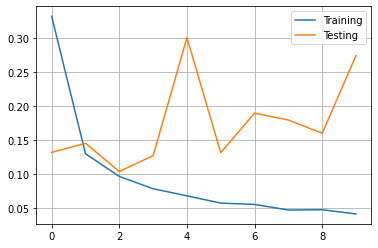

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [6]:
#pred = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
pred=np.argmax(predict_x,axis=1)
me.confusion_matrix(y_test, pred)

array([[ 973,    1,    0,    0,    1,    0,    2,    1,    2,    0],
       [   0, 1124,    1,    2,    0,    0,    0,    1,    7,    0],
       [   2,    1, 1014,    1,    1,    0,    0,    8,    5,    0],
       [   2,    0,    1,  979,    0,    1,    0,   12,   15,    0],
       [   1,    0,    2,    0,  967,    0,    3,    4,    1,    4],
       [   6,    0,    0,   11,    0,  844,    6,   15,    7,    3],
       [   3,    2,    0,    1,    5,    1,  944,    0,    2,    0],
       [   2,    3,    5,    1,    0,    0,    0, 1013,    4,    0],
       [   4,    0,    2,    1,    3,    1,    0,    4,  956,    3],
       [   2,    3,    0,    2,   11,    2,    0,   12,    7,  970]],
      dtype=int64)

Note: you may need to restart the kernel to use updated packages.


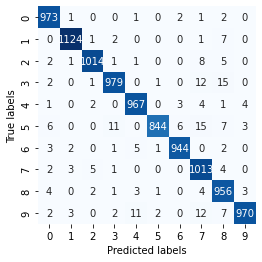

In [7]:
%pip install seaborn --upgrade
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(y_true)
    cm = me.confusion_matrix(y_true, y_pred)
    
    sns.heatmap(
        cm, annot=True, fmt='g',
        xticklabels=unique_labels, yticklabels=unique_labels,
        square=True, cbar=False,
        cmap="Blues"
    )
    pl.xlabel("Predicted labels")
    pl.ylabel("True labels")

    pl.show()

plot_confusion_matrix(y_test, pred)